In [ ]:
# Import libraries

import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [ ]:
# Creating a virtual operating system and variable

if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [ ]:
# Data analysis and visualization

sp500.index = pd.to_datetime(sp500.index)

In [ ]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [ ]:
sp500.shape

(23958, 7)

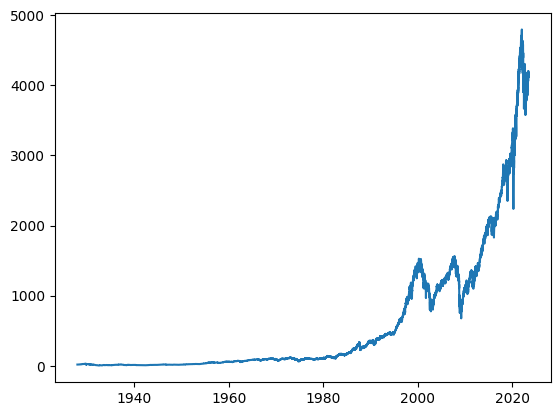

In [ ]:
plt.plot(sp500.Close)
plt.show()

In [ ]:
# Data preprocessing and feature engineering

del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [ ]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [ ]:
sp500 = sp500.loc["1990-01-01":].copy()

In [ ]:
# Random forest classifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=10)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=10)

In [ ]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.42857142857142855

In [ ]:
# Decision tree

clf = tree.DecisionTreeClassifier()
clf.fit(train[predictors], train["Target"])

DecisionTreeClassifier()

In [ ]:
preds = clf.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5094339622641509

In [ ]:
# Logistic regression

clf = LogisticRegression(random_state=100)
clf.fit(train[predictors], train["Target"])

LogisticRegression(random_state=100)

In [ ]:
preds = clf.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5